# Loading and Handling TS in Pandas

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [46]:
data = pd.read_csv('Desktop/household_power_consumptions.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

   id                 Time  Global_active_power  Global_reactive_power  \
0   1  17/12/2006 00:00:00                1.044                  0.152   
1   2  17/12/2006 00:01:00                1.520                  0.220   
2   3  17/12/2006 00:02:00                3.038                  0.194   
3   4  17/12/2006 00:03:00                2.974                  0.194   
4   5  17/12/2006 00:04:00                2.846                  0.198   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0   242.73               4.4               0               2               0  
1   242.20               7.4               0               1               0  
2   240.14              12.6               0               2               0  
3   239.97              12.4               0               1               0  
4   240.39              11.8               0               2               0  

 Data Types:
id                         int64
Time                      object
G

In [47]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y %H:%M:%S')
data = pd.read_csv('Desktop/household_power_consumptions.csv', parse_dates=['Time'], index_col='Time',date_parser=dateparse)
print (data.head())

                     id  Global_active_power  Global_reactive_power  Voltage  \
Time                                                                           
2006-12-17 00:00:00   1                1.044                  0.152   242.73   
2006-12-17 00:01:00   2                1.520                  0.220   242.20   
2006-12-17 00:02:00   3                3.038                  0.194   240.14   
2006-12-17 00:03:00   4                2.974                  0.194   239.97   
2006-12-17 00:04:00   5                2.846                  0.198   240.39   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Time                                                                    
2006-12-17 00:00:00               4.4               0               2   
2006-12-17 00:01:00               7.4               0               1   
2006-12-17 00:02:00              12.6               0               2   
2006-12-17 00:03:00              12.4               0               1   
2

In [48]:
#check datatype of index
data.index

DatetimeIndex(['2006-12-17 00:00:00', '2006-12-17 00:01:00',
               '2006-12-17 00:02:00', '2006-12-17 00:03:00',
               '2006-12-17 00:04:00', '2006-12-17 00:05:00',
               '2006-12-17 00:06:00', '2006-12-17 00:07:00',
               '2006-12-17 00:08:00', '2006-12-17 00:09:00',
               ...
               '2007-02-02 23:50:00', '2007-02-02 23:51:00',
               '2007-02-02 23:52:00', '2007-02-02 23:53:00',
               '2007-02-02 23:54:00', '2007-02-02 23:55:00',
               '2007-02-02 23:56:00', '2007-02-02 23:57:00',
               '2007-02-02 23:58:00', '2007-02-02 23:59:00'],
              dtype='datetime64[ns]', name='Time', length=69120, freq=None)

In [49]:
#convert to time series:
ts = data['Global_intensity']
ts.head(10)

Time
2006-12-17 00:00:00     4.4
2006-12-17 00:01:00     7.4
2006-12-17 00:02:00    12.6
2006-12-17 00:03:00    12.4
2006-12-17 00:04:00    11.8
2006-12-17 00:05:00    11.8
2006-12-17 00:06:00    11.8
2006-12-17 00:07:00    10.8
2006-12-17 00:08:00     3.0
2006-12-17 00:09:00     4.8
Name: Global_intensity, dtype: float64

### Indexing TS arrays:

In [50]:
ts['2006-12-17']

Time
2006-12-17 00:00:00     4.4
2006-12-17 00:01:00     7.4
2006-12-17 00:02:00    12.6
2006-12-17 00:03:00    12.4
2006-12-17 00:04:00    11.8
2006-12-17 00:05:00    11.8
2006-12-17 00:06:00    11.8
2006-12-17 00:07:00    10.8
2006-12-17 00:08:00     3.0
2006-12-17 00:09:00     4.8
2006-12-17 00:10:00    10.8
2006-12-17 00:11:00    10.8
2006-12-17 00:12:00    10.8
2006-12-17 00:13:00    10.6
2006-12-17 00:14:00    10.4
2006-12-17 00:15:00     8.0
2006-12-17 00:16:00     1.8
2006-12-17 00:17:00     4.6
2006-12-17 00:18:00    10.2
2006-12-17 00:19:00    10.0
2006-12-17 00:20:00     9.8
2006-12-17 00:21:00     9.6
2006-12-17 00:22:00     1.2
2006-12-17 00:23:00     4.6
2006-12-17 00:24:00     9.6
2006-12-17 00:25:00     9.6
2006-12-17 00:26:00     9.8
2006-12-17 00:27:00     9.6
2006-12-17 00:28:00     9.8
2006-12-17 00:29:00     4.0
                       ... 
2006-12-17 23:30:00     2.2
2006-12-17 23:31:00     2.2
2006-12-17 23:32:00     2.2
2006-12-17 23:33:00     2.2
2006-12-17 23:3

# Checking for stationarity

### Plot the time-series

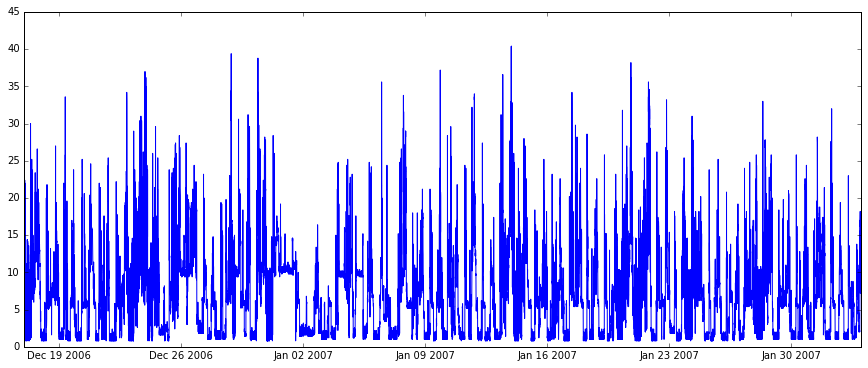

In [51]:
plt.plot(ts)

### Function for testing stationarity

In [52]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


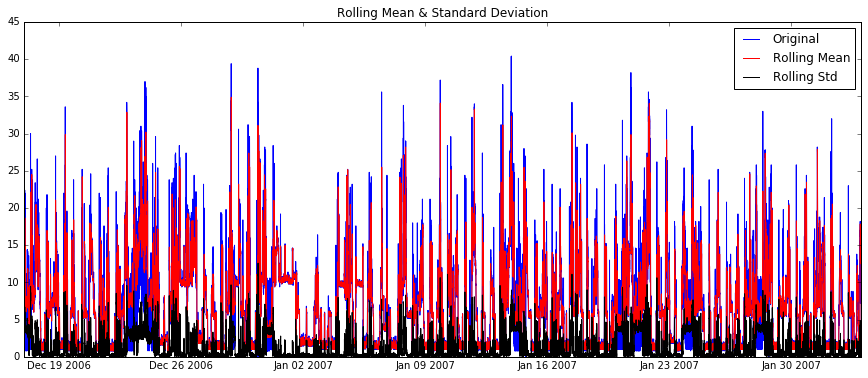

Results of Dickey-Fuller Test:
Test Statistic                -1.365003e+01
p-value                        1.592358e-25
#Lags Used                     6.000000e+01
Number of Observations Used    6.905900e+04
Critical Value (10%)          -2.566792e+00
Critical Value (5%)           -2.861582e+00
Critical Value (1%)           -3.430445e+00
dtype: float64


In [42]:
test_stationarity(ts)

# Making TS Stationary

## Estimating & Eliminating Trend

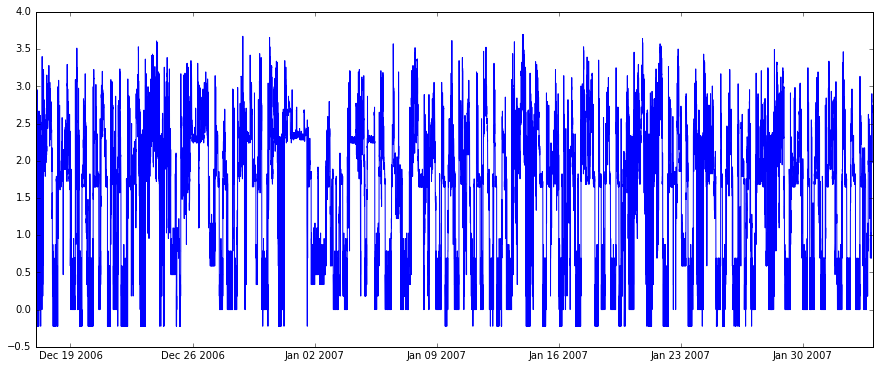

In [53]:
ts_log = np.log(ts)
plt.plot(ts_log)

## Smoothing:

### Moving average

/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=1440).mean()
  if __name__ == '__main__':


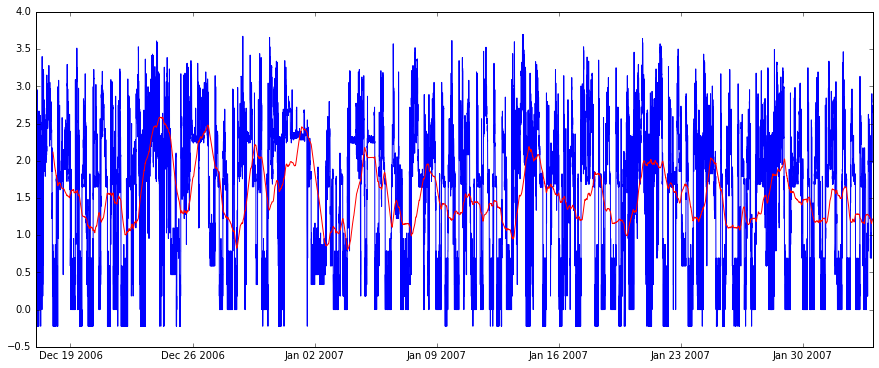

In [54]:
moving_avg = pd.rolling_mean(ts_log,1440)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [22]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(1440)

Time
2006-12-17 00:00:00         NaN
2006-12-17 00:01:00         NaN
2006-12-17 00:02:00         NaN
2006-12-17 00:03:00         NaN
2006-12-17 00:04:00         NaN
2006-12-17 00:05:00         NaN
2006-12-17 00:06:00         NaN
2006-12-17 00:07:00         NaN
2006-12-17 00:08:00         NaN
2006-12-17 00:09:00         NaN
2006-12-17 00:10:00         NaN
2006-12-17 00:11:00         NaN
2006-12-17 00:12:00         NaN
2006-12-17 00:13:00         NaN
2006-12-17 00:14:00         NaN
2006-12-17 00:15:00         NaN
2006-12-17 00:16:00         NaN
2006-12-17 00:17:00         NaN
2006-12-17 00:18:00         NaN
2006-12-17 00:19:00         NaN
2006-12-17 00:20:00         NaN
2006-12-17 00:21:00         NaN
2006-12-17 00:22:00         NaN
2006-12-17 00:23:00         NaN
2006-12-17 00:24:00         NaN
2006-12-17 00:25:00         NaN
2006-12-17 00:26:00         NaN
2006-12-17 00:27:00         NaN
2006-12-17 00:28:00         NaN
2006-12-17 00:29:00         NaN
                         ...   
200

In [56]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Time
2006-12-17 23:59:00   -1.933358
2006-12-18 00:00:00   -1.932456
2006-12-18 00:01:00   -2.113388
2006-12-18 00:02:00   -2.334617
2006-12-18 00:03:00   -2.332713
Name: Global_intensity, dtype: float64

/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


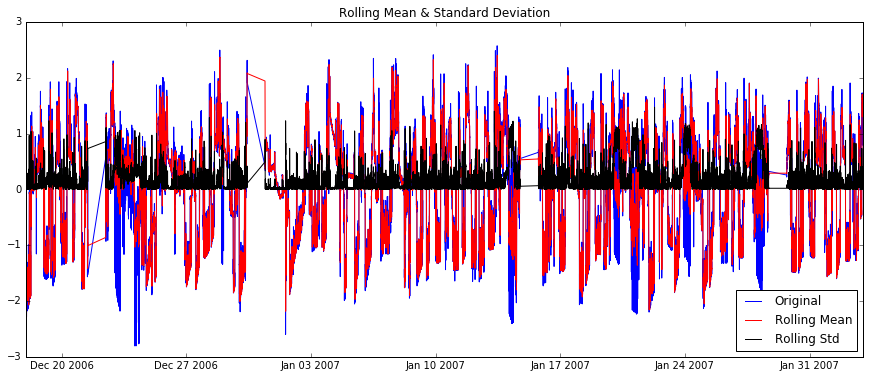

Results of Dickey-Fuller Test:
Test Statistic                -1.234363e+01
p-value                        6.040433e-23
#Lags Used                     6.000000e+01
Number of Observations Used    6.185800e+04
Critical Value (10%)          -2.566795e+00
Critical Value (5%)           -2.861587e+00
Critical Value (1%)           -3.430456e+00
dtype: float64


In [57]:
test_stationarity(ts_log_moving_avg_diff)

## Eliminating Trend and Seasonality

### Differencing:

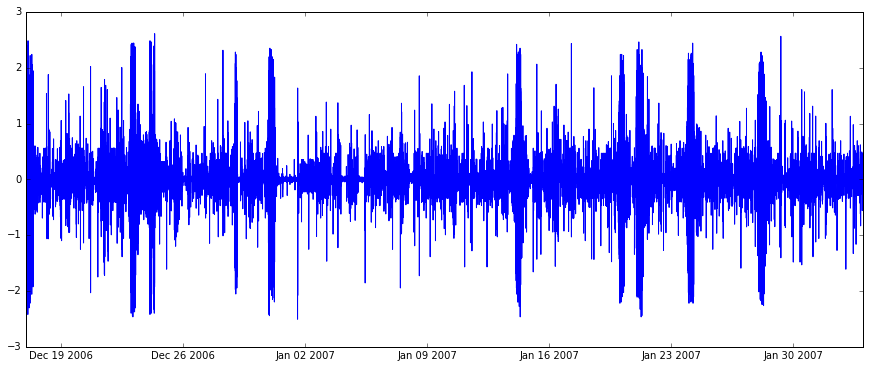

In [59]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/home/amfirnas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


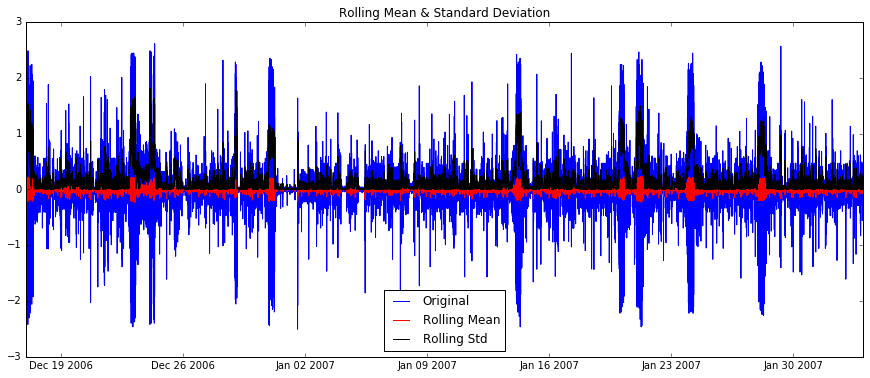

Results of Dickey-Fuller Test:
Test Statistic                   -40.785053
p-value                            0.000000
#Lags Used                        61.000000
Number of Observations Used    69057.000000
Critical Value (10%)              -2.566792
Critical Value (5%)               -2.861582
Critical Value (1%)               -3.430445
dtype: float64


In [60]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Final Forecasting

### ACF & PACF Plots

In [61]:
from statsmodels.tsa.arima_model import ARIMA

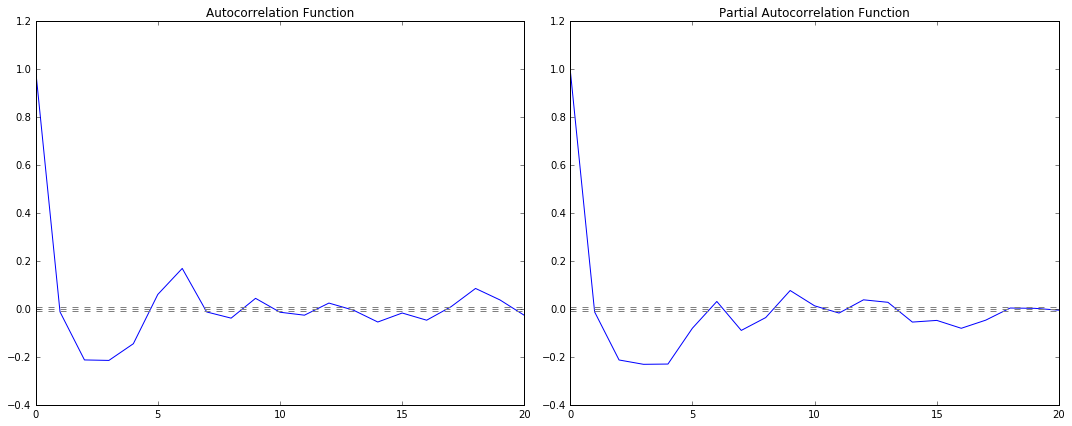

In [62]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR Model:

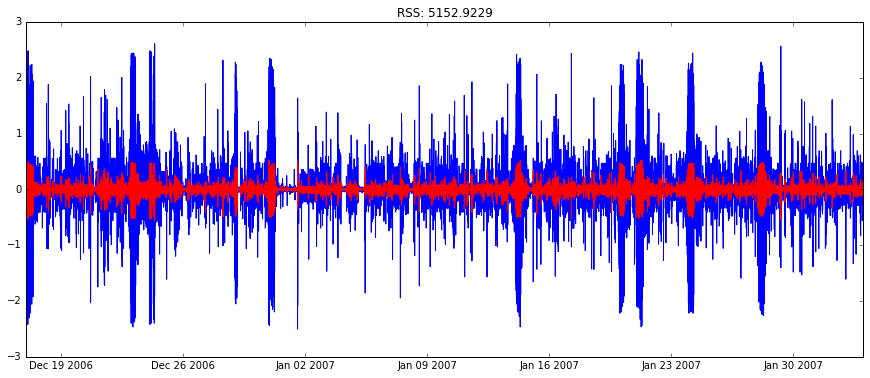

In [63]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

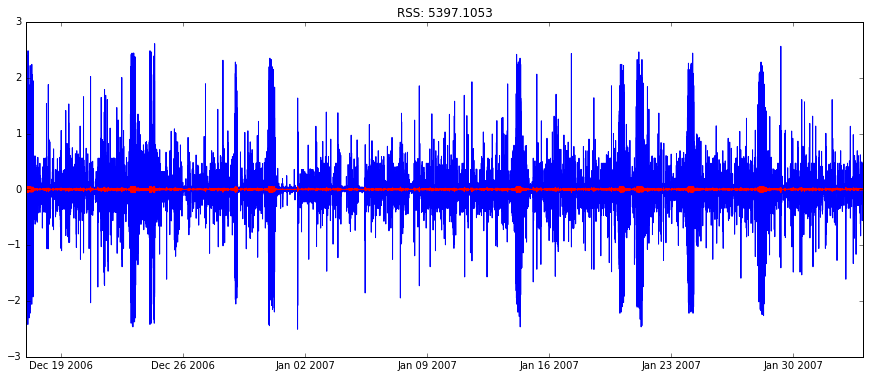

In [64]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

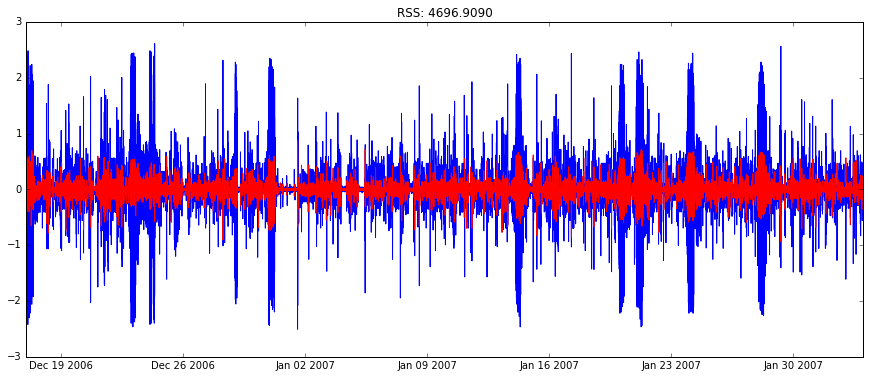

In [65]:
model = ARIMA(ts_log, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Convert to original scale:

In [66]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Time
2006-12-17 00:01:00    0.000011
2006-12-17 00:02:00   -0.006359
2006-12-17 00:03:00   -0.145983
2006-12-17 00:04:00   -0.235141
2006-12-17 00:05:00   -0.156865
dtype: float64


In [67]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Time
2006-12-17 00:01:00    0.000011
2006-12-17 00:02:00   -0.006349
2006-12-17 00:03:00   -0.152332
2006-12-17 00:04:00   -0.387472
2006-12-17 00:05:00   -0.544338
dtype: float64


In [68]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Time
2006-12-17 00:00:00    1.481605
2006-12-17 00:01:00    1.481615
2006-12-17 00:02:00    1.475256
2006-12-17 00:03:00    1.329273
2006-12-17 00:04:00    1.094132
dtype: float64

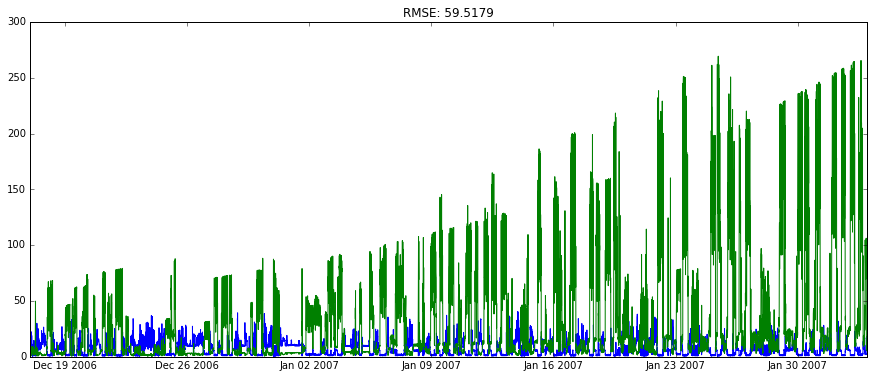

In [69]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))